In [ ]:
import numpy as np
from numpy.fft import ifftshift, ifft2, fftshift, fft2
from numpy import exp, pi, mean, var, abs

from matplotlib import pyplot as plt
%matplotlib inline 

from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase

In [2]:
plt.rc('figure', figsize=[10,10])

In [26]:
Lin = 1e-3
Lout=100
fm = 5.92/Lin/(2*pi)
f0=1/Lout

deltax = 0.005
N=512
wvl=0.532e-6
Dz=50e3
ntrial=1
nscreen=20
kpow=22/6

Np=5

Rytov=0.8

In [27]:
for itrial in range(ntrial):
    k=2*pi/wvl
    nn=np.arange(-np.floor(N/2), np.floor(N/2))
    nx, ny = np.meshgrid(nn, nn)
    nsq = nx**2 + ny**2
    z=np.linspace(0,Dz,nscreen)
    
    deltaz=z[1]-z[0]
    deltaf=1/(N*deltax)
    
    Cn2=Rytov/(0.312 * k**(7/6) * Dz**(11/6))
    r0_Dz = (.423*k**2*Cn2*Dz)**(-3/5)
    
    fx=nx*deltaf
    fy=ny*deltaf
    fsq=fx**2+fy**2
    
    Uin=np.ones([N, N])
    g=Uin
    
    for idx in range(nscreen-1):
        r0 = (.423*(k**2)*Cn2*deltaz)**(-3/5)
        
        fm = 5.92/Lin/(2*pi)
        f0=1/Lout
        
        PSD_phi = 0.023 * r0**(-5/3) * exp(-(fsq/fm**2)) / (fsq + f0**2)**(kpow/2)
        PSD_phi[int(N/2),int(N/2)] = 0
        
        cnm = (np.random.randn(N, N) + 1j*np.random.randn(N, N) ) * np.sqrt(PSD_phi)*deltaf
        phz = np.real(ifftshift(ifft2(ifftshift(cnm)))*(N*1)**2)
        
        Q2 = exp(-1j*pi**2*2*deltaz/k*fsq)
        G= Q2*fftshift(fft2(fftshift(g)))*deltax**2
        g = ifftshift(ifft2(ifftshift(G)))*(N*deltaf)**2
        
        g = exp(1j*phz) * g
        
    Uout = g

In [28]:
Asq=abs(Uout)**2
varI=var(Asq)
meanI=mean(Asq)

In [29]:
print("Rytov = {}\nCn2 = {}\nr0 = {}\nvarI = {}\nmeanI = {}".format(Rytov, Cn2, r0, varI, meanI))

Rytov = 0.8
Cn2 = 3.492829954992591e-17
r0 = 0.3626081728806431
varI = 1.8715562551823797
meanI = 0.999999999999987


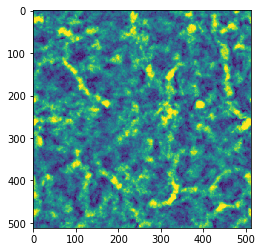

In [365]:
plt.imshow(Asq**(1/2)).set_clim(0.0, 2)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

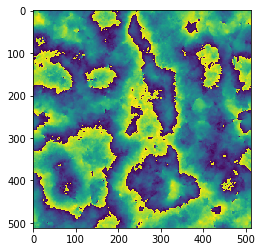

In [366]:
plt.imshow(np.angle(Uout))
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

In [367]:
uw = np.unwrap(np.angle(Uout), axis=0)

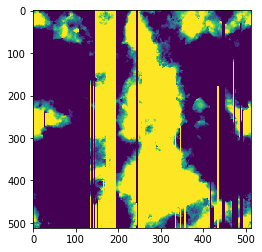

In [368]:
plt.imshow(uw).set_clim(0.0, 2)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

In [370]:
uw2 = unwrap_phase(np.angle(Uout), wrap_around=True)

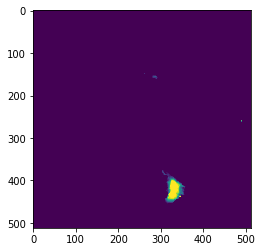

In [374]:
plt.imshow(uw2).set_clim(0.0, 2)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

In [390]:
image = abs(Uout)
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
image_wrapped = np.angle(Uout)
image_unwrapped = unwrap_phase(image_wrapped, wrap_around=True)

In [ ]:
var()

In [393]:
var(image_unwrapped)

9.189115036817938

Text(0.5, 1.0, 'Unwrapped minus original')

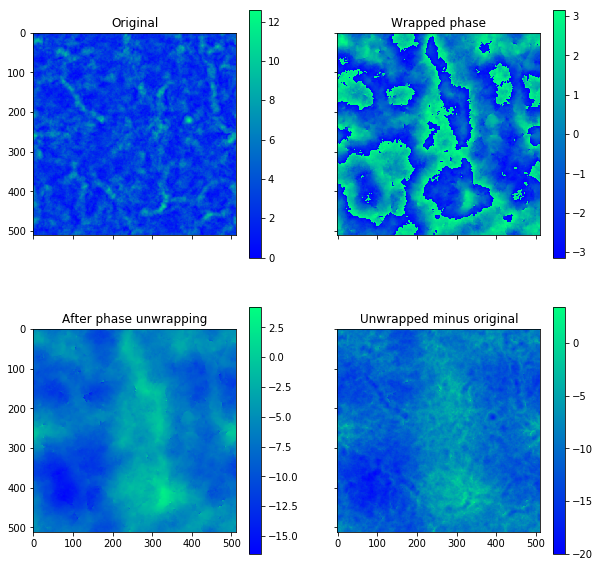

In [391]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(image, cmap='winter', vmin=0, vmax=4 * np.pi), ax=ax1)
ax1.set_title('Original')

fig.colorbar(ax2.imshow(image_wrapped, cmap='winter', vmin=-np.pi, vmax=np.pi),
             ax=ax2)
ax2.set_title('Wrapped phase')

fig.colorbar(ax3.imshow(image_unwrapped, cmap='winter'), ax=ax3)
ax3.set_title('After phase unwrapping')

fig.colorbar(ax4.imshow(image_unwrapped - image, cmap='winter'), ax=ax4)
ax4.set_title('Unwrapped minus original')

In [12]:
def subharmonics(Np, phz_hi):
    phz_lo = np.zeros(np.shape(phz_hi))

    nn=np.arange(-np.floor(N/2), np.floor(N/2)) * deltax
    nx, ny = np.meshgrid(nn, nn)

    for p in range(Np):
        k=2*pi/wvl
        Cn2=Rytov/(0.312 * k**(7/6) * Dz**(11/6))
        r0_Dz = (.423*k**2*Cn2*Dz)**(-3/5)
    
        deltaf=1/((Np**p)*(N*deltax))
    
        fx = np.linspace(-Np,1,Np, endpoint=True)
        fx, fy = np.meshgrid(fx, fx)
    
        fx=fx*deltaf
        fy=fy*deltaf
        fsq=fx**2+fy**2
    
        z=np.linspace(0,Dz,nscreen)
        deltaz=z[1]-z[0]
    
        r0 = (.423*(k**2)*Cn2*deltaz)**(-3/5)
        
        fm = 5.92/Lin/(2*pi)
        f0=1/Lout
        
        PSD_phi = 0.023 * r0**(-5/3) * exp(-(fsq/fm**2)) / (fsq + f0**2)**(kpow/2)
        PSD_phi[int(Np/2),int(Np/2)] = 0
    
        cnm = (np.random.randn(Np, Np) + 1j*np.random.randn(Np, Np) ) * np.sqrt(PSD_phi)*deltaf
        SH = np.zeros(N)
    
        for xi in range(Np):
            for yi in range(Np):
                SH = SH + cnm[xi][yi] * np.exp(1j*2*pi*(fx[xi][yi]*nx + fy[xi][yi]*ny))

        phz_lo = phz_lo + SH

    return np.real(phz_lo) - mean(np.real(phz_lo))

In [15]:
def ft_sh_phase_screen(Np=5):
    k=2*pi/wvl
    nn=np.arange(-np.floor(N/2), np.floor(N/2))
    nx, ny = np.meshgrid(nn, nn)
    nsq = nx**2 + ny**2
    z=np.linspace(0,Dz,nscreen)
    
    deltaz=z[1]-z[0]
    deltaf=1/(N*deltax)
    
    Cn2=Rytov/(0.312 * k**(7/6) * Dz**(11/6))
    r0_Dz = (.423*k**2*Cn2*Dz)**(-3/5)
    
    fx=nx*deltaf
    fy=ny*deltaf
    fsq=fx**2+fy**2
    
    Uin=np.ones([N, N])
    g=Uin
    
    for idx in range(nscreen-1):
        r0 = (.423*(k**2)*Cn2*deltaz)**(-3/5)
        
        fm = 5.92/Lin/(2*pi)
        f0=1/Lout
        
        PSD_phi = 0.023 * r0**(-5/3) * exp(-(fsq/fm**2)) / (fsq + f0**2)**(kpow/2)
        PSD_phi[int(N/2),int(N/2)] = 0
        
        cnm = (np.random.randn(N, N) + 1j*np.random.randn(N, N) ) * np.sqrt(PSD_phi)*deltaf
        phz_hi = np.real(ifftshift(ifft2(ifftshift(cnm)))*(N*1)**2)
        phz_lo = subharmonics(Np, phz_hi)
        phz = phz_hi + phz_lo
        
        Q2 = exp(-1j*pi**2*2*deltaz/k*fsq)
        G= Q2*fftshift(fft2(fftshift(g)))*deltax**2
        g = ifftshift(ifft2(ifftshift(G)))*(N*deltaf)**2
        
        g = exp(1j*phz) * g
        
    Uout = g
    
    Asq=abs(Uout)**2
    varI=var(Asq)
    meanI=mean(Asq)
    print("Rytov = {}\nCn2 = {}\nr0 = {}\nvarI = {}\nmeanI = {}".format(Rytov, Cn2, r0, varI, meanI))
    
    return Uout

In [16]:
Uout = ft_sh_phase_screen(Np=0)

Rytov = 0.2
Cn2 = 8.732074887481478e-18
r0 = 0.8330548233929504
varI = 0.7472283953739959
meanI = 0.9999999999999881


In [17]:
#Asq=abs(Uout)**2
#varI=var(Asq)
#meanI=mean(Asq)

In [8]:
print("Rytov = {}\nCn2 = {}\nr0 = {}\nvarI = {}\nmeanI = {}".format(Rytov, Cn2, r0, varI, meanI))

NameError: name 'Cn2' is not defined

In [ ]:
plt.imshow(Uout)#.set_clim(0.0, 1)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

In [ ]:
plt.imshow(np.angle(Uout))
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

In [ ]:
uw = np.unwrap(np.angle(Uout))

In [ ]:
plt.imshow(uw)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

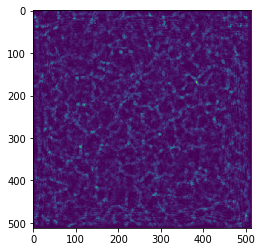

In [85]:
plt.imshow(Asq)#.set_clim(0.0, 1)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

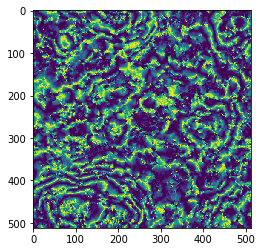

In [300]:
plt.imshow(np.angle(Uout)**2)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.show()

In [297]:
np.angle(Uout)

array([[ 0.53371053,  0.56613353,  0.37254831, ...,  0.59996796,
         0.39429504,  0.40687074],
       [ 0.81205879,  0.73052814,  0.68709652, ...,  0.8331461 ,
         0.87950638,  0.81920611],
       [ 1.0927878 ,  1.04237442,  1.02712441, ...,  1.12846925,
         1.15958952,  1.0407123 ],
       ...,
       [ 0.0702013 ,  0.21925568,  0.03162112, ...,  0.51015841,
         0.16462471, -0.03993327],
       [ 0.19438719,  0.36541993,  0.28188528, ...,  0.5487098 ,
         0.42823904,  0.06723008],
       [ 0.35633159,  0.42162397,  0.29371267, ...,  0.57634863,
         0.41066805,  0.26019378]])

In [301]:
mean(np.angle(Uout)**2)

3.2137040806090096

In [302]:
var(np.angle(Uout))

3.2096612039980155

In [303]:
mean(np.angle(Uout))

0.06358361904606075